In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams

import networkx as nx
import scipy.io

import numpy as np
import scipy as sc

In [2]:
mat = scipy.io.loadmat('data/minnesota.mat')

In [3]:
# Adjacency matrix
A = mat['A']

In [4]:
A.shape

(2642, 2642)

In [5]:
# Node attributes
features = mat['xy']
features

array([[-97.207,  49.001],
       [-96.801,  49.   ],
       [-95.957,  49.   ],
       ...,
       [-93.247,  43.5  ],
       [-93.353,  43.5  ],
       [-93.493,  43.499]])

In [6]:
G=nx.from_scipy_sparse_matrix(A)

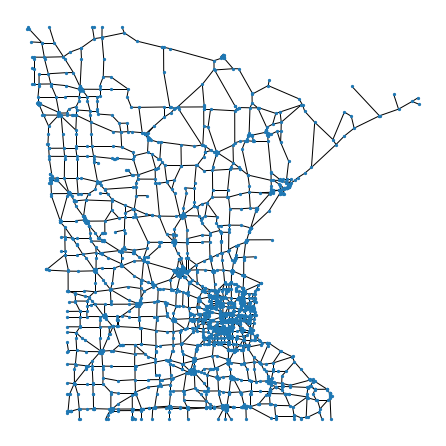

In [7]:
rcParams['figure.figsize'] = 6, 6
nx.draw(G, features, node_size=5)
plt.show()

### Sparsity of the adjacency matrix $A$

In [8]:
def show_sparsity(mat):
    rcParams['figure.figsize'] = 20, 20

    fig = plt.figure()
    ax1 = fig.add_subplot(221)

    ax1.spy(mat, precision=0.1, markersize=1)
    plt.show()

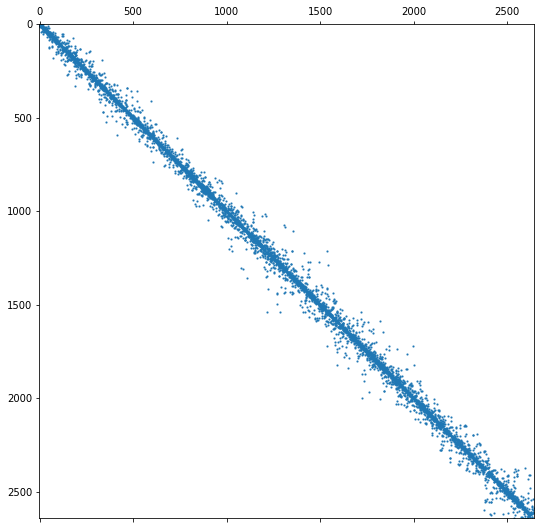

In [9]:
show_sparsity(A)

### Graph laplacian

In [10]:
L = nx.linalg.laplacian_matrix(G, weight=None).astype(np.float)

In [11]:
L

<2642x2642 sparse matrix of type '<class 'numpy.float64'>'
	with 9248 stored elements in Compressed Sparse Row format>

# Fourier Transform

## Eigen value decomposition

In [32]:
!pip install block_timer
from block_timer.timer import Timer

In [27]:
# Sparse (Hermatian) computation, not all possible
with Timer('Sparse Hermatian'):
    theta, U = sc.sparse.linalg.eigsh(L, k=L.shape[0]-1)

[Sparse] Total time 46.15537 seconds.


In [30]:
# Sparse computation, not all possible
with Timer('Sparse'):
    theta, U = sc.sparse.linalg.eigs(L, k=L.shape[0]-2)

[Sparse] Total time 143.26618 seconds.


In [28]:
theta

array([-1.83324271e-14,  8.44938594e-04,  2.07732544e-03, ...,
        6.65672619e+00,  6.73311834e+00,  6.87955442e+00])

In [25]:
# Dense (Hermatian) computation
with Timer('Dense Hermatian'):
    theta, U = sc.linalg.eigh(L.toarray())

[Dense] Total time 2.93802 seconds.


In [31]:
# Dense computation
with Timer('Dense'):
    theta, U = sc.linalg.eig(L.toarray())

[Dense] Total time 10.63748 seconds.


In [26]:
theta

array([-2.08987081e-16,  1.37842035e-16,  8.44938594e-04, ...,
        6.65672619e+00,  6.73311834e+00,  6.87955442e+00])

### Eigen values

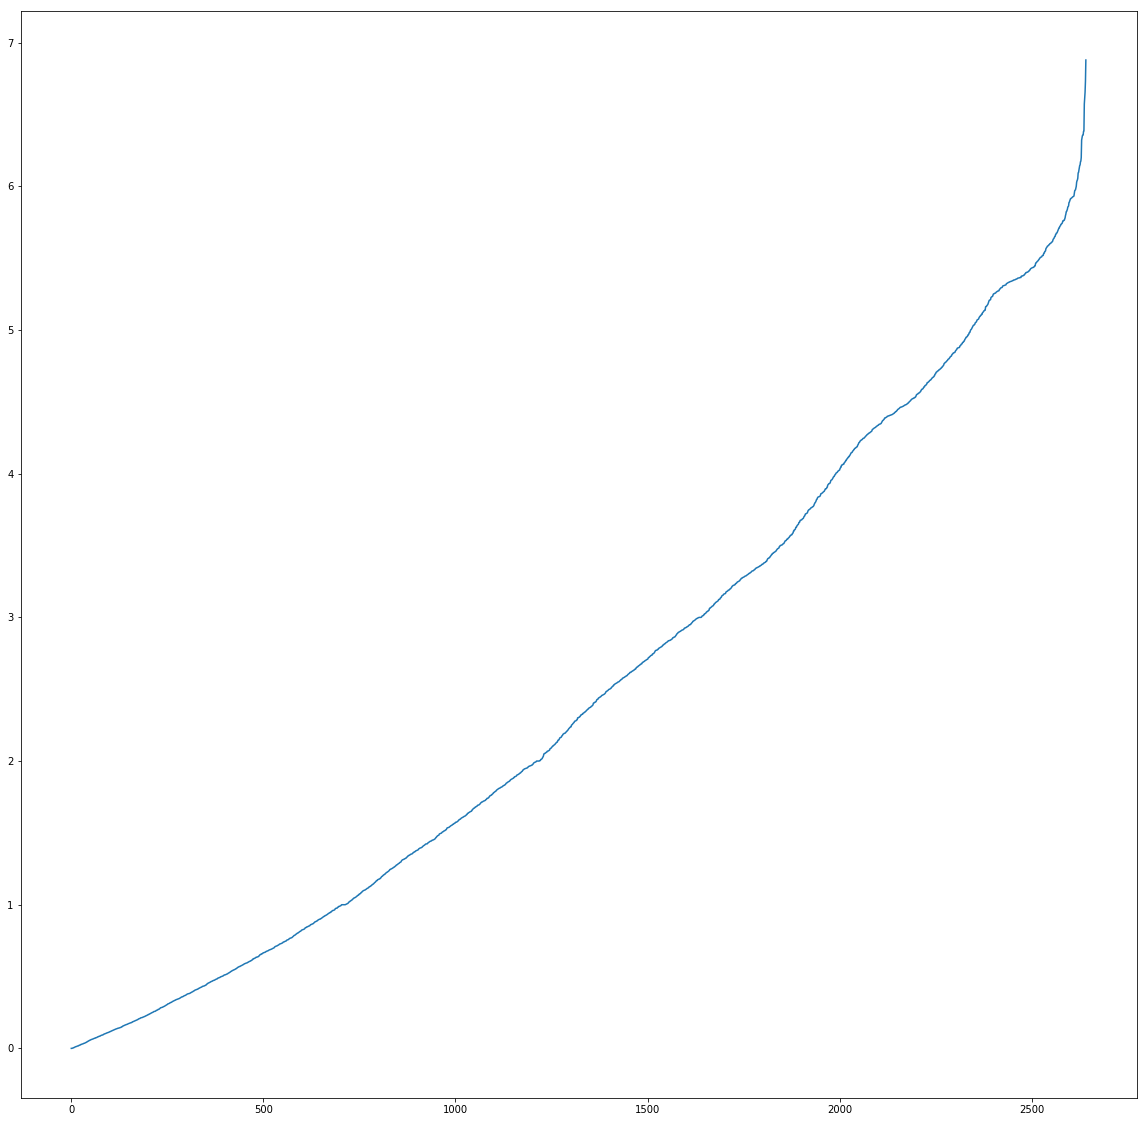

In [35]:
plt.plot(sorted(theta))
plt.show()